# Part II - Prosper Data Analysis 
## by Ntombi Mashila

## Investigation Overview

> This presentation seeks to convey the results of the explanatory anlyssis performed on Prosper Loan data in order to help the company improve on it's Lending strategy. 

>The key insights from the investigation were:

>- The score dsitribution is bell shaped, with most customers scoring at the middle of the distribution and very few customers at the lower and upper tails. 

>- LP_NetPrincipalLoss is strongly correlated with Original Loan amount. 

>- Wedding loans and business loans carry large loss amounts when they default.

>- The longer the term of the loan the higher the loss amount.(LP_NetPrincipalLoss).

>- The Loss amount increases with the Risk Score.


## Dataset Overview

> The Prosper data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I decided to focus on loans that have resulted in a net loss for the bank. I used the feature LP_NetPrincipalLoss to create a subset of the Prosper data set.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.head()
Loss_df=df[df['LP_NetPrincipalLoss']>0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1

> The score dsitribution is bell shaped, with most customers scoring at the middle of the distribution and very few customers at the lower and upper tails. This is typical of any scoring distribution.

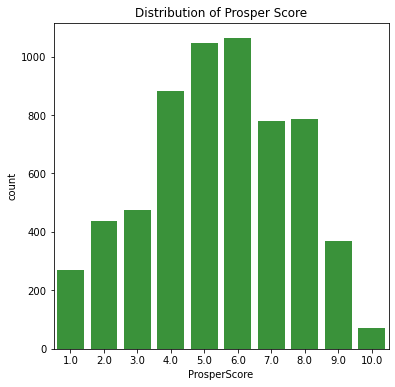

In [10]:
def plot_uni_bar(var):
    sb.countplot(data=Loss_df,x=var,color=sb.color_palette()[2]);

plt.figure(figsize=[6,6])    
plot_uni_bar('ProsperScore')
plt.title('Distribution of Prosper Score');

## Visualization 2

> There is a positive correlation between LoanOriginalAmount and NetPrincipaLoss.

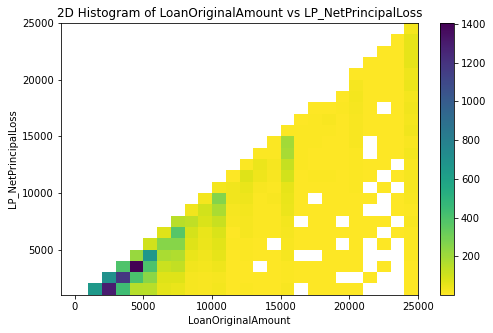

In [11]:
bins_x=np.arange(-1000,25000+1000,1000)
bins_y=np.arange(1000,25000+1000,1000)
plt.figure(figsize=(8,5))
plt.hist2d(data = Loss_df, x = 'LoanOriginalAmount', y = 'LP_NetPrincipalLoss', cmin=0.1, 
           cmap='viridis_r',bins=[bins_x,bins_y])
plt.colorbar()
plt.title('2D Histogram of LoanOriginalAmount vs LP_NetPrincipalLoss')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('LP_NetPrincipalLoss');

## Visualization 3

>Wedding Loans and business loans have very long tails. This tells us that the the Lender incurs large losses for these type of loans when they default.

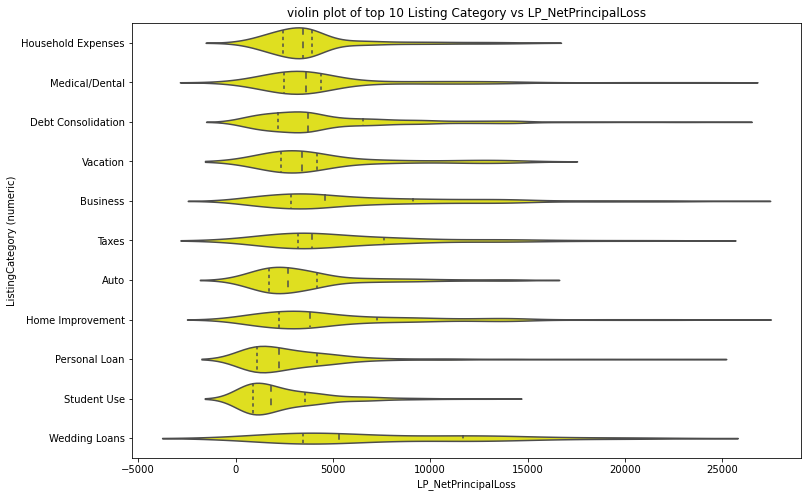

In [15]:
plt.figure(figsize=[12,8])
Category_map={
    0 : "Not Available",
    1 : "Debt Consolidation",
    2 : "Home Improvement", 
    3 : "Business",
    4 : "Personal Loan", 
    5 : "Student Use",
    6 : "Auto",
    7 : "Other", 
    8 : "Baby&Adoption", 
    9 : "Boat",
    10 : "Cosmetic Procedure",
    11 : "Engagement Ring", 
    12 : "Green Loans", 
    13 : "Household Expenses", 
    14 : "Large Purchases",
    15 : "Medical/Dental", 
    16 : "Motorcycle",
    17 : "RV", 
    18 : "Taxes",
    19 : "Vacation",
    20 : "Wedding Loans"}
def map_code_to_cat(loan):
    if loan['ListingCategory (numeric)'] in Category_map.keys():
        label=Category_map[loan['ListingCategory (numeric)']]
        return label
    else:
        return loan['ListingCategory (numeric)']
Loss_df['ListingCategory (numeric)']=Loss_df.apply(map_code_to_cat, axis=1)

Top10Cat=["Debt Consolidation", "Business" ,"Home Improvement","Personal Loan","Auto",                   
"Household Expenses","Student Use","Medical/Dental","Vacation","Taxes","Wedding Loans" ]          

Loss_df['ListingCategory (numeric)'].value_counts()
ListingCategory10=Loss_df[(Loss_df['ListingCategory (numeric)']).isin(Top10Cat) ]


sb.violinplot(data=ListingCategory10,y='ListingCategory (numeric)', x='LP_NetPrincipalLoss', 
              color='yellow', inner='quartile')
plt.title('Violin plot of top 10 Listing Category vs LP_NetPrincipalLoss');

## Visualization 4
>The longer the term of the loan the higher the loss amount

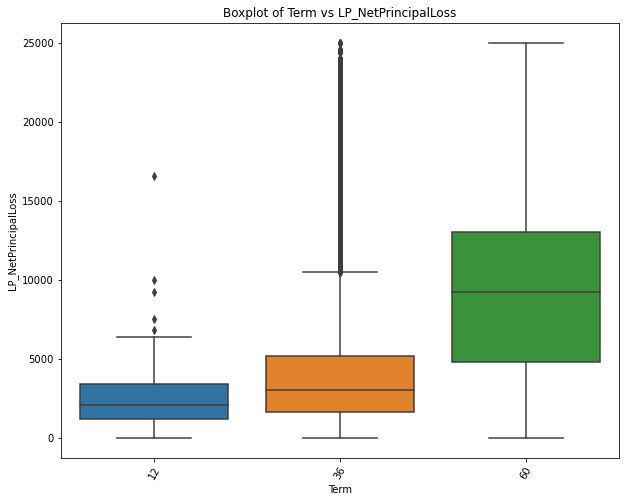

In [18]:
plt.figure(figsize=[10,8])
sb.boxplot(data =Loss_df,x='Term',y='LP_NetPrincipalLoss')
plt.xticks(rotation=60)
plt.title('Boxplot of Term vs LP_NetPrincipalLoss');

## Visualization 5
>The NetPrincipalLoss increases as the Risk grade increases for both home owners and non home owners.

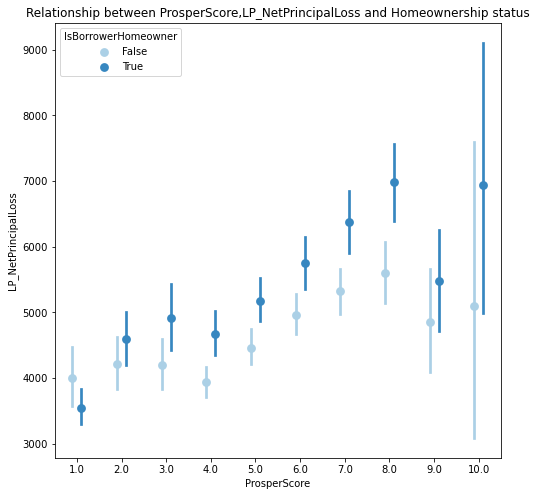

In [20]:
plt.figure(figsize=[8,8])
sb.pointplot(data = Loss_df, x = 'ProsperScore', y = 'LP_NetPrincipalLoss', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.2)
plt.title('Relationship between ProsperScore,LP_NetPrincipalLoss and Homeownership status');

In [3]:
!jupyter nbconvert Part_II_slide_deck_ProsperData.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_ProsperData.ipynb to slides
[NbConvertApp] Writing 730218 bytes to Part_II_slide_deck_ProsperData.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/ntombimashila/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/ntombimashila/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/ntombimashila/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/ntombimashila/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/Users/ntombimashila/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvert